# Assignment2

## A. Creating Spark Session and Loading the Data

### Step 01: Import pyspark and initialize Spark

In [1]:
# if you dont have pyspark on your own laptop, please pip it to install
# !pip install pyspark

import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.mongodb.spark:mongo-spark-connector_2.11:2.4.0 pyspark-shell'
#import SparkContext, SparkConf, and SparkSession
from pyspark import SparkContext, SparkConf 
from pyspark.sql import SparkSession

# Create or get an SparkContext
sc = SparkContext.getOrCreate()

# If there is no existing spark context, we now create a new context, I decide to use 3 cores
if (sc is None):
    sc = SparkContext(master="local[4]", appName="FIT5202 Assignment2")

spark = SparkSession(sparkContext=sc)\
        .builder\
        .appName("FIT5202 Assignment2")\
        .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.11:2.4.0")\
        .config("spark.mongodb.input.uri", "mongodb://127.0.0.1/fit5202_assignment2")\
        .config("spark.mongodb.output.uri", "mongodb://127.0.0.1/fit5202_assignment2")\
        .getOrCreate()

### Step 02: Load the dataset and print the schema and total number of entries

In [2]:
# Create dataframe of Australian Weather
# Please change the file path when you run this function
au_weather = spark.read.csv('/Users/guojie/Desktop/FIT5202/Assignment2/weatherAUS.csv',\
                          header=True, inferSchema=True)
total_number = au_weather.count()
print("The number of records of  Australian weather is: " + str(total_number))
print(" ")
print("The Schema of Australian weather data frame is presented below:")
au_weather.printSchema()
au_weather.take(5)

The number of records of  Australian weather is: 142193
 
The Schema of Australian weather data frame is presented below:
root
 |-- Date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- Evaporation: string (nullable = true)
 |-- Sunshine: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- Cloud9am: string (nullable = true)
 |-- Cloud3pm: string (nullable = true)
 |-- Temp9am: string (nullable = true)
 |-- Temp3pm: string (nullable = true)
 |-

[Row(Date=datetime.datetime(2008, 12, 1, 0, 0), Location='Albury', MinTemp='13.4', MaxTemp='22.9', Rainfall='0.6', Evaporation='NA', Sunshine='NA', WindGustDir='W', WindGustSpeed='44', WindDir9am='W', WindDir3pm='WNW', WindSpeed9am='20', WindSpeed3pm='24', Humidity9am='71', Humidity3pm='22', Pressure9am='1007.7', Pressure3pm='1007.1', Cloud9am='8', Cloud3pm='NA', Temp9am='16.9', Temp3pm='21.8', RainToday='No', RainTomorrow='No'),
 Row(Date=datetime.datetime(2008, 12, 2, 0, 0), Location='Albury', MinTemp='7.4', MaxTemp='25.1', Rainfall='0', Evaporation='NA', Sunshine='NA', WindGustDir='WNW', WindGustSpeed='44', WindDir9am='NNW', WindDir3pm='WSW', WindSpeed9am='4', WindSpeed3pm='22', Humidity9am='44', Humidity3pm='25', Pressure9am='1010.6', Pressure3pm='1007.8', Cloud9am='NA', Cloud3pm='NA', Temp9am='17.2', Temp3pm='24.3', RainToday='No', RainTomorrow='No'),
 Row(Date=datetime.datetime(2008, 12, 3, 0, 0), Location='Albury', MinTemp='12.9', MaxTemp='25.7', Rainfall='0', Evaporation='NA', 

## B. Data Cleaning and Processing

### Step 03: Delete columns from the dataset

In [3]:
# Delete useless data
# A drop list of useless data 
drop_list = ['Date', 'Location', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm'] 
new_au_weather = au_weather.select([column for column in au_weather.columns if column not in drop_list]) # delte the dta
print("The Schema of new data frame is presented below:")
new_au_weather.printSchema()
print("The top five records of new data frame is presented below:")
new_au_weather.show()

The Schema of new data frame is presented below:
root
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)

The top five records of new data frame is presented below:
+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+---------+------------+
|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindS

### Step 04: Print the number of missing data in each column

In [4]:
def calculate_number_of_missing_data(column_name):
    """
    Calculate and print the missing data in each column of Australia Weather DataFrame

    Args:
        Name of each column

    Returns:
        Void 

    """
    na_information = new_au_weather.filter(new_au_weather[column_name] =='NA') # filter the column equals to ''NA"
    print("The number of mission data in " + column_name +" column is: " + str(na_information.count())) # print the result 

for name in new_au_weather.columns:  # for each columns, use the function
    calculate_number_of_missing_data(name)

The number of mission data in MinTemp column is: 637
The number of mission data in MaxTemp column is: 322
The number of mission data in Rainfall column is: 1406
The number of mission data in WindGustDir column is: 9330
The number of mission data in WindGustSpeed column is: 9270
The number of mission data in WindDir9am column is: 10013
The number of mission data in WindDir3pm column is: 3778
The number of mission data in WindSpeed9am column is: 1348
The number of mission data in WindSpeed3pm column is: 2630
The number of mission data in Humidity9am column is: 1774
The number of mission data in Humidity3pm column is: 3610
The number of mission data in Pressure9am column is: 14014
The number of mission data in Pressure3pm column is: 13981
The number of mission data in RainToday column is: 1406
The number of mission data in RainTomorrow column is: 0


### Step 05: Fill the missing data with average value and maximum occurrence value

In [5]:
# import udf 
from pyspark.sql.functions import udf, col
# import type
from pyspark.sql.types import DoubleType
from pyspark.sql import functions as F

non_numeric_list = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'] # the list of non numeric 

def change_type(data_str):
    """
    Change the String type to float type

    Args:
        String of data

    Returns:
        float

    """
    return float(data_str)

change_type_udfs = udf(change_type,returnType=DoubleType()) # change the data type of string to double to do the calculation


def fill_missing_data(column_name,weather_df):
    """
    fill missing data (num - average | string - most frequent item) in each column of Australia Weather DataFrame

    Args:
        Name of each column

    Returns:
        new dataframe

    """
    if column_name in non_numeric_list: # if the column is non-numeric
        non_na_weather =  weather_df.filter(weather_df[column_name] !='NA') # Filter null data and create a new dataframe
        frequent_weather = non_na_weather.groupBy(column_name).count().collect() # group by the column name and get the list
        item_list = [row[column_name] for row in frequent_weather] # the list of string name sort in Desc order
        frequent_list = [row['count'] for row in frequent_weather] # frequent list of different items sort in Desc order
        weather_df = weather_df.replace('NA',item_list[0],column_name) # replace the column from 'NA' to the most frequence item
    else: # if the column is numeric 
        non_na_weather =  weather_df.filter(weather_df[column_name] !='NA') # Filter null data and create a new dataframe
        new_df = non_na_weather.withColumn(column_name,change_type_udfs(column_name))  #chang the column from string to float
        float_result_list = new_df.agg(F.mean(new_df[column_name])).collect() #use functions of mean to calculate mean value and get the list
        float_result = round(float_result_list[0]['avg('+column_name+')'],1) #get the result and round it in 1, eg 14.0 
        weather_df = weather_df.replace('NA',str(float_result),column_name) #replace the column from 'NA' to the average number of all non-null rows 
    return weather_df
 
if __name__ == '__main__':
    weather_df = new_au_weather #copy the new_au_weather to weather_df
    for name in weather_df.columns:  # for each columns, use the function
        weather_df = fill_missing_data(name,weather_df) 
    weather_df.show()

+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+---------+------------+
|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|RainToday|RainTomorrow|
+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+---------+------------+
|   13.4|   22.9|     0.6|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       No|          No|
|    7.4|   25.1|       0|        WNW|           44|       NNW|       WSW|           4|          22|         44|         25|     1010.6|     1007.8|       No|          No|
|   12.9|   25.7|       0|        WSW|           46|         W|       WSW|          19|          26|         38|         30|     1007.6|    

In [6]:
# check the result  of new dataframe after step05
def calculate_number_of_missing_data_after_step5(column_name):
    """
    Calculate and print the missing data in each column of Australia Weather DataFrame after step05 to have a check

    Args:
        Name of each column

    Returns:
        Void 

    """
    na_information = weather_df.filter(weather_df[column_name] =='NA') # filter the column equals to ''NA"
    print("After step05, the number of mission data in " + column_name +" column is: " + str(na_information.count())) # print the result 

for name in weather_df.columns:  # for each columns, use the function
    calculate_number_of_missing_data_after_step5(name)

After step05, the number of mission data in MinTemp column is: 0
After step05, the number of mission data in MaxTemp column is: 0
After step05, the number of mission data in Rainfall column is: 0
After step05, the number of mission data in WindGustDir column is: 0
After step05, the number of mission data in WindGustSpeed column is: 0
After step05, the number of mission data in WindDir9am column is: 0
After step05, the number of mission data in WindDir3pm column is: 0
After step05, the number of mission data in WindSpeed9am column is: 0
After step05, the number of mission data in WindSpeed3pm column is: 0
After step05, the number of mission data in Humidity9am column is: 0
After step05, the number of mission data in Humidity3pm column is: 0
After step05, the number of mission data in Pressure9am column is: 0
After step05, the number of mission data in Pressure3pm column is: 0
After step05, the number of mission data in RainToday column is: 0
After step05, the number of mission data in R

### Step 06: Data transformation

In [7]:
# import udf 
from pyspark.sql.functions import udf, col
# import type
from pyspark.sql.types import DoubleType
from pyspark.sql import functions as F
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

non_numeric_list = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'] # the list of non numeric 
change_type_udfs = udf(change_type,returnType=DoubleType()) # change the data type of string to double to do the calculation

def change_type(data_str):
    """
    Change the String type to float type

    Args:
        String of data

    Returns:
        float

    """
    return float(data_str)

def data_transformation(column_name,double_weather_df):
    """
    fill missing data (num - average | string - most frequent item) in each column of Australia Weather DataFrame

    Args:
        Name of each column

    Returns:
        new dataframe

    """
    if column_name in non_numeric_list: # if the column is non-numeric
        if column_name == 'RainTomorrow':
            l_indexer = StringIndexer(inputCol=column_name, outputCol='labelIndex') 
            double_weather_df = l_indexer.fit(double_weather_df).transform(double_weather_df) #the column to new column of double
        else:
            l_indexer = StringIndexer(inputCol=column_name, outputCol='New_' + column_name)  #StringIndexer from string to double
            double_weather_df = l_indexer.fit(double_weather_df).transform(double_weather_df) #the column to new column of double
    else: # if the column is numeric 
        double_weather_df = double_weather_df.withColumn(column_name,change_type_udfs(column_name))  #chang the column from string to float
    return double_weather_df
 
if __name__ == '__main__':
    double_weather_df = weather_df #copy the new_au_weather to weather_df
    for name in double_weather_df.columns:  # for each columns, use the function
        double_weather_df = data_transformation(name,double_weather_df) 
    for name in non_numeric_list: # for each privious column, drop it
        double_weather_df = double_weather_df.drop(name)
    double_weather_df.show(3)
    double_weather_df.printSchema()

+-------+-------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+---------------+--------------+--------------+-------------+----------+
|MinTemp|MaxTemp|Rainfall|WindGustSpeed|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|New_WindGustDir|New_WindDir9am|New_WindDir3pm|New_RainToday|labelIndex|
+-------+-------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+---------------+--------------+--------------+-------------+----------+
|   13.4|   22.9|     0.6|         44.0|        20.0|        24.0|       71.0|       22.0|     1007.7|     1007.1|            1.0|           6.0|           7.0|          0.0|       0.0|
|    7.4|   25.1|     0.0|         44.0|         4.0|        22.0|       44.0|       25.0|     1010.6|     1007.8|            9.0|           9.0|           4.0|          0.0|       0.0|
|   12.9|   25.7|     0.0|         46.0|        19.0|        26.0|    

### Step 07: Create the feature vector and divide the dataset

In [8]:
from pyspark.ml.linalg import Vectors # import vectors 
from pyspark.ml.feature import VectorAssembler # import the vectorassembler

features_list = [] #new list to store the feature
for name in double_weather_df.columns:
    if name != 'labelIndex': # apart label index 
        features_list.append(name)
vector_assembler = VectorAssembler(inputCols=features_list,outputCol="features") #transform features 
df_temp = vector_assembler.transform(double_weather_df)
for name in features_list:
    df_temp = df_temp.drop(name) # after transform, drop the privous column
df_temp.show(15)

(trainingData, testData) = df_temp.randomSplit([0.7, 0.3]) # seperate the trainning and testting data in to 70% and 30%
trainingData.show(5)
testData.show(5)

+----------+--------------------+
|labelIndex|            features|
+----------+--------------------+
|       0.0|[13.4,22.9,0.6,44...|
|       0.0|[7.4,25.1,0.0,44....|
|       0.0|[12.9,25.7,0.0,46...|
|       0.0|[9.2,28.0,0.0,24....|
|       0.0|[17.5,32.3,1.0,41...|
|       0.0|[14.6,29.7,0.2,56...|
|       0.0|[14.3,25.0,0.0,50...|
|       0.0|[7.7,26.7,0.0,35....|
|       1.0|[9.7,31.9,0.0,80....|
|       0.0|[13.1,30.1,1.4,28...|
|       1.0|[13.4,30.4,0.0,30...|
|       1.0|[15.9,21.7,2.2,31...|
|       1.0|[15.9,18.6,15.6,6...|
|       0.0|[12.6,21.0,3.6,44...|
|       0.0|[9.8,27.7,2.3,50....|
+----------+--------------------+
only showing top 15 rows

+----------+--------------------+
|labelIndex|            features|
+----------+--------------------+
|       0.0|(14,[0,1,2,3,6,7,...|
|       0.0|(14,[0,1,2,3,6,7,...|
|       0.0|(14,[0,1,2,3,6,7,...|
|       0.0|(14,[0,1,2,3,6,7,...|
|       0.0|(14,[0,1,2,3,6,7,...|
+----------+--------------------+
only showing top 5 row

## C. Apply Machine Learning Algorithms

### Step 08: Apply machine learning classification algorithms on the dataset and compare their accuracy. Plot the accuracy as bar graph.

In [9]:
# Decision Tree
from pyspark.ml.classification import DecisionTreeClassifier # import descision tree classifier
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator # classfication evaluator

dt = DecisionTreeClassifier(labelCol="labelIndex", featuresCol="features") 
model = dt.fit(trainingData) # training the data use decision tree

predictions = model.transform(testData) # test the data

predictions.select("prediction", "labelIndex").show(10) # show top five 
decision_tree_df = predictions.select("prediction", "labelIndex") # get the dataframe of prediction and label pair
evaluator = MulticlassClassificationEvaluator(\

labelCol="labelIndex", predictionCol="prediction",\

metricName="accuracy") # get the evaluater
accuracy_decision_tree = evaluator.evaluate(predictions) # get the accuracy
decision_tree_rdd = decision_tree_df.rdd # transform the dataframe to rdd for MulticlassMetrics analysis 
metrics_decision_tree = MulticlassMetrics(decision_tree_rdd) # tet the multiclassmertrics of decision tree
print("Test Accuracy of Decision Tree is:  " + str(accuracy_decision_tree ))

+----------+----------+
|prediction|labelIndex|
+----------+----------+
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
+----------+----------+
only showing top 10 rows

Test Accuracy of Decision Tree is:  0.8335561967766908


In [10]:
# RandomForest
from pyspark.ml.classification import RandomForestClassifier # import randomforest
from pyspark.mllib.evaluation import MulticlassMetrics
rf = RandomForestClassifier(labelCol="labelIndex",\
featuresCol="features", numTrees=10)

model = rf.fit(trainingData) #build the model 

predictions = model.transform(testData) # test the data 
random_forest_df = predictions.select("prediction", "labelIndex") # get the dataframe of prediction and label pair
predictions.select("prediction", "labelIndex").show(5)

evaluator =\
MulticlassClassificationEvaluator(labelCol="labelIndex",\
predictionCol="prediction", metricName="accuracy")

accuracy_randomforest = evaluator.evaluate(predictions) # get the accuracy

random_forest_rdd = random_forest_df.rdd # transform the dataframe to rdd for MulticlassMetrics analysis 
metrics_random_forest = MulticlassMetrics(decision_tree_rdd) # tet the multiclassmertrics of decision tree

print("Test Accuracy of Random Rainforest is  " + str(accuracy_randomforest))

+----------+----------+
|prediction|labelIndex|
+----------+----------+
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
+----------+----------+
only showing top 5 rows

Test Accuracy of Random Rainforest is  0.8279025031083586


In [11]:
#Logistic Regression
from pyspark.ml.classification import LogisticRegression # import logistic regression
from pyspark.mllib.evaluation import MulticlassMetrics
lr = LogisticRegression(labelCol="labelIndex", featuresCol="features",    maxIter=10)
lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)
predictions.select("prediction", "labelIndex").show(5)
logistic_regression_df = predictions.select("prediction", "labelIndex") # get the dataframe of prediction and label pair
evaluator =\
MulticlassClassificationEvaluator(labelCol="labelIndex",\
predictionCol="prediction", metricName="accuracy")

accuracy_lr = evaluator.evaluate(predictions) # get the accuracy
logistic_regression_rdd = logistic_regression_df.rdd # transform the dataframe to rdd for MulticlassMetrics analysis 
metrics_logistic_regression = MulticlassMetrics(logistic_regression_rdd) # tet the multiclassmertrics of decision tree
print("Test Accuracy of Logistic Regression is  " + str(accuracy_lr))

+----------+----------+
|prediction|labelIndex|
+----------+----------+
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
+----------+----------+
only showing top 5 rows

Test Accuracy of Logistic Regression is  0.8146479930560443


In [12]:
# GBT 
from pyspark.ml.classification import GBTClassifier
from pyspark.mllib.evaluation import MulticlassMetrics
gbt = GBTClassifier(labelCol="labelIndex", featuresCol="features",maxIter=10)
gbtModel = gbt.fit(trainingData) # training the model 
predictions = gbtModel.transform(testData) #test the model
predictions.select("prediction", "labelIndex").show(5) 
gbt_df = predictions.select("prediction", "labelIndex") # get the dataframe of prediction and label pair
evaluator =\
MulticlassClassificationEvaluator(labelCol="labelIndex",\
predictionCol="prediction", metricName="accuracy")
accuracy_gbt = evaluator.evaluate(predictions)
gbt_rdd = gbt_df.rdd # transform the dataframe to rdd for MulticlassMetrics analysis 
metrics_gbt = MulticlassMetrics(gbt_rdd) # tet the multiclassmertrics of decision tree
print("Test Accuracy of Gradient-Boosted Tree Classifier is  " + str(accuracy_gbt))

+----------+----------+
|prediction|labelIndex|
+----------+----------+
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
+----------+----------+
only showing top 5 rows

Test Accuracy of Gradient-Boosted Tree Classifier is  0.8398198325005278


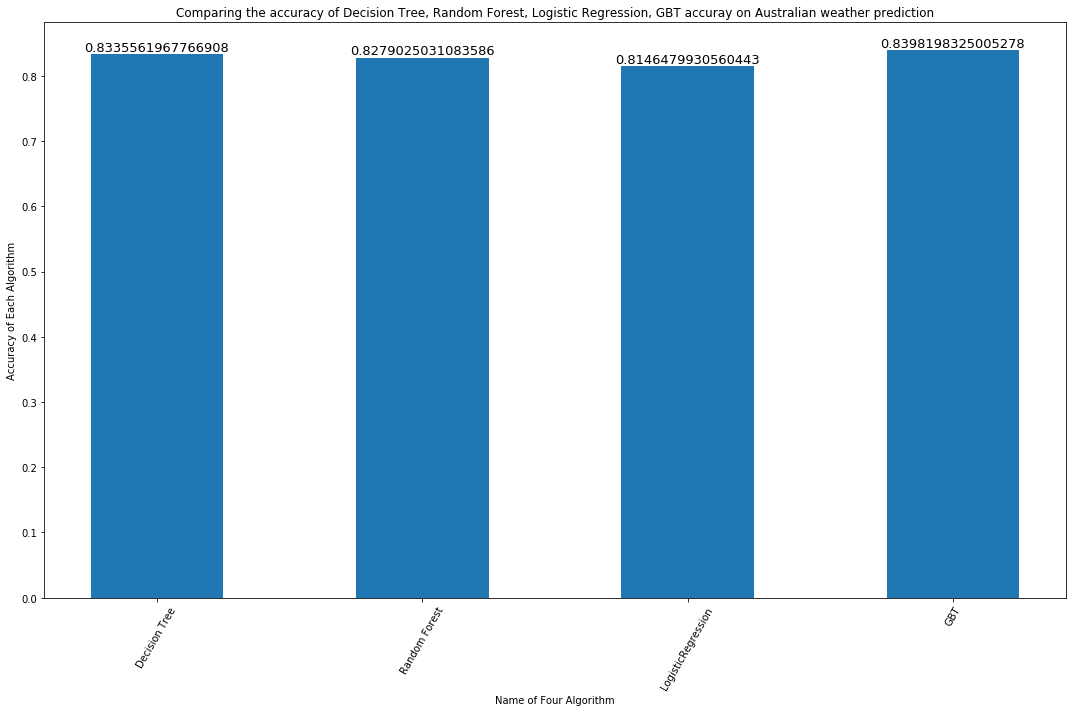

In [13]:
# scrum book
# prepare data
# !pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

accuracy_y = [accuracy_decision_tree, accuracy_randomforest, accuracy_lr, accuracy_gbt] # build the list of accuray
al_name_x = ['Decision Tree', 'Random Forest', 'LogisticRegression','GBT'] # build the x axis labels
bar_width = 0.5 # band wideth of the bar
# plot
plt.rcParams['figure.figsize'] = (15.0, 10.0) # figure size
plt.bar(al_name_x,accuracy_y, bar_width, align='center', color='C0')
for x, y in zip(al_name_x, accuracy_y ):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=13) # name the bar label
plt.xlabel('Name of Four Algorithm') # x axis name 
plt.xticks(rotation=60) # rotation
plt.ylabel('Accuracy of Each Algorithm') # y axis name 
plt.title('Comparing the accuracy of Decision Tree, Random Forest, Logistic Regression, GBT accuray on Australian weather prediction')
plt.tight_layout()
plt.show() # show the plot 

### Step 09: Calculate the confusion matrix and find the precision, recall, and F1 score of each classification algorithm. Explain how the accuracy of the predication can be improved?

#### Precision

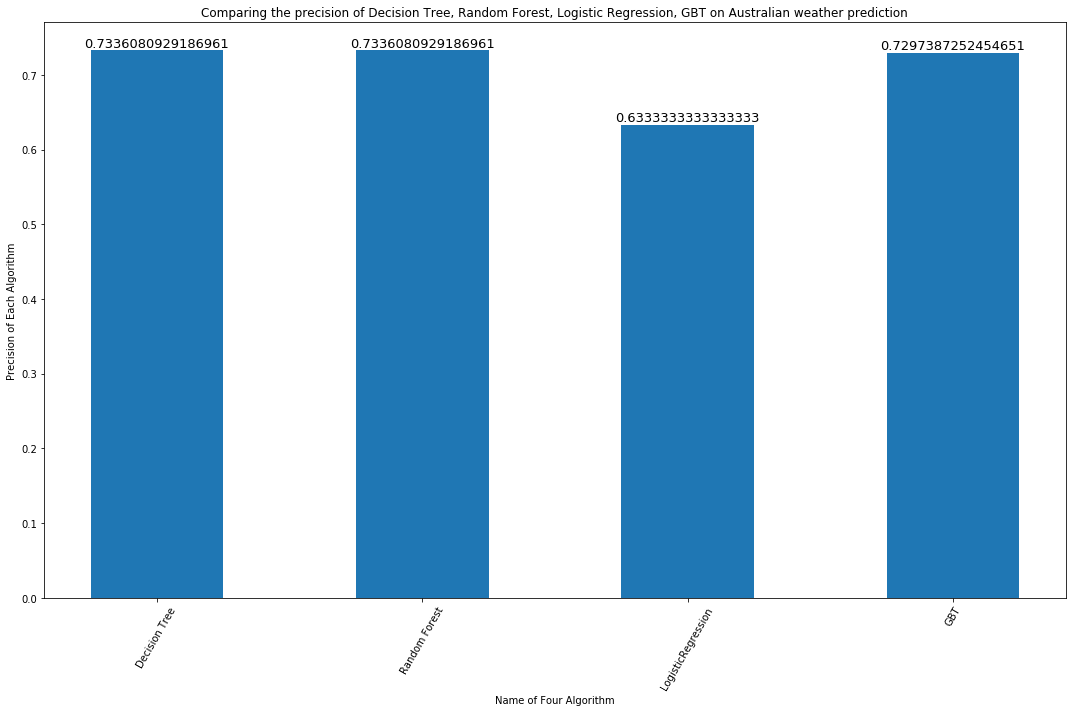

In [14]:
#From Step 08, I get four MulticlassMetrics object, by input the a pair (prediction and label) rdd pair.
#In this section, I will compare the precision between these four algorithm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
precision_decision_tree = metrics_decision_tree.precision(1.0) #1.0 represent Rain Tomorrow Yes, from v2.0, paramater label
precision_random_forest = metrics_random_forest.precision(1.0)
precision_logistic_regression = metrics_logistic_regression.precision(1.0)
precision_gbt = metrics_gbt.precision(1.0)


accuracy_y = [precision_decision_tree, precision_random_forest, precision_logistic_regression, precision_gbt] # build the list of precision
al_name_x = ['Decision Tree', 'Random Forest', 'LogisticRegression','GBT'] # build the x axis labels
bar_width = 0.5 # band wideth of the bar
# plot
plt.rcParams['figure.figsize'] = (15.0, 10.0) # figure size
plt.bar(al_name_x,accuracy_y, bar_width, align='center', color='C0')
for x, y in zip(al_name_x, accuracy_y ):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=13) # name the bar label
plt.xlabel('Name of Four Algorithm') # x axis name 
plt.xticks(rotation=60) # rotation
plt.ylabel('Precision of Each Algorithm') # y axis name 
plt.title('Comparing the precision of Decision Tree, Random Forest, Logistic Regression, GBT on Australian weather prediction')
plt.tight_layout()
plt.show() # show the plot 

#### Recall

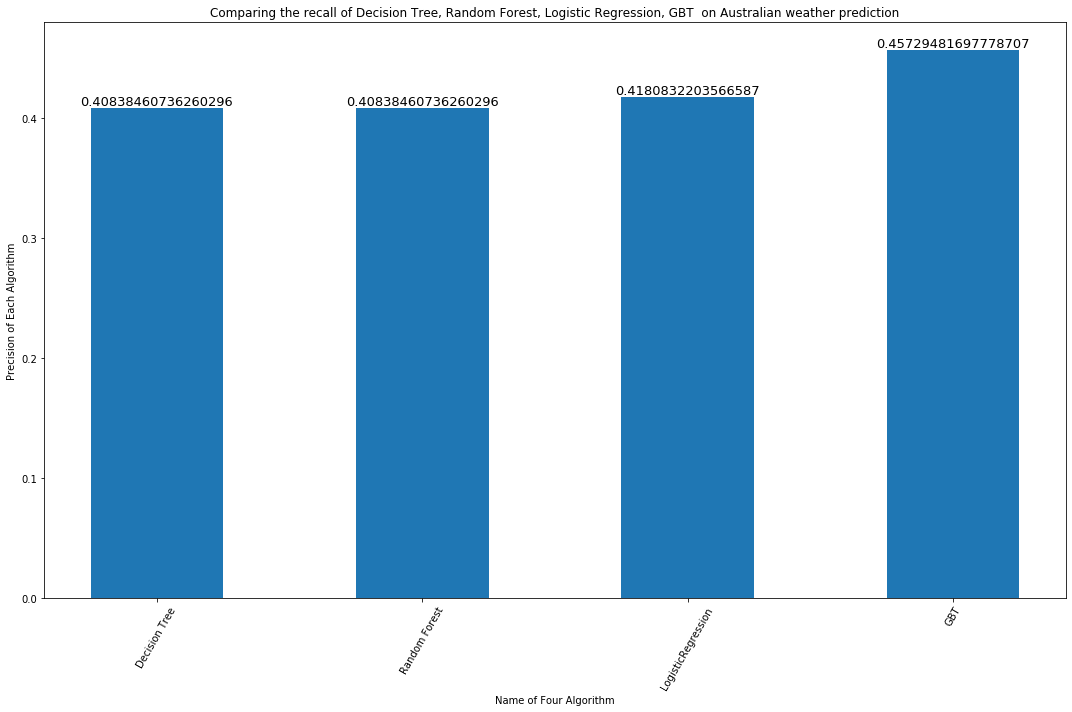

The recall of Decision Tree is: 0.40838460736260296
The recall of Random Forest is: 0.40838460736260296
The recall of Logistic Regression is: 0.4180832203566587
The recall of GBT is: 0.45729481697778707


In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
recall_decision_tree = metrics_decision_tree.recall(1.0) # 1.0 also represent Rain Tomorrow Yes
recall_random_forest = metrics_random_forest.recall(1.0)
recall_logistic_regression = metrics_logistic_regression.recall(1.0)
recall_gbt = metrics_gbt.recall(1.0)

accuracy_y = [recall_decision_tree, recall_random_forest, recall_logistic_regression, recall_gbt] # build the list of recall
al_name_x = ['Decision Tree', 'Random Forest', 'LogisticRegression','GBT'] # build the x axis labels
bar_width = 0.5 # band wideth of the bar
# plot
plt.rcParams['figure.figsize'] = (15.0, 10.0) # figure size
plt.bar(al_name_x,accuracy_y, bar_width, align='center', color='C0')
for x, y in zip(al_name_x, accuracy_y ):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=13) # name the bar label
plt.xlabel('Name of Four Algorithm') # x axis name 
plt.xticks(rotation=60) # rotation
plt.ylabel('Precision of Each Algorithm') # y axis name 
plt.title('Comparing the recall of Decision Tree, Random Forest, Logistic Regression, GBT  on Australian weather prediction')
plt.tight_layout()
plt.show() # show the plot 
print("The recall of Decision Tree is: " + str(recall_decision_tree))
print("The recall of Random Forest is: " + str(recall_random_forest))
print("The recall of Logistic Regression is: " + str(recall_logistic_regression))
print("The recall of GBT is: " + str(recall_gbt))


####  F1 score

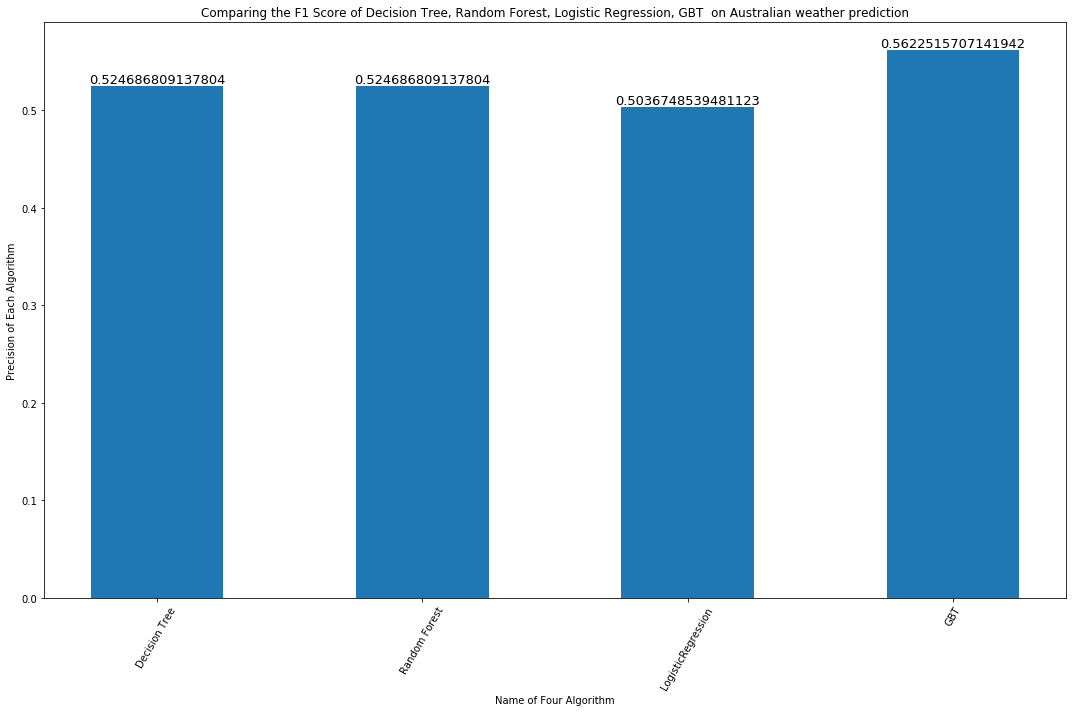

The recall of Decision Tree is: 0.524686809137804
The recall of Random Forest is: 0.524686809137804
The recall of Logistic Regression is: 0.5036748539481123
The recall of GBT is: 0.5622515707141942


In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
f1_decision_tree = metrics_decision_tree.fMeasure(1.0) #1.0 represent Tomorrow Yes
f1_random_forest = metrics_random_forest.fMeasure(1.0)
f1_logistic_regression = metrics_logistic_regression.fMeasure(1.0)
f1_gbt = metrics_gbt.fMeasure(1.0)

accuracy_y = [f1_decision_tree, f1_random_forest, f1_logistic_regression, f1_gbt] # build the list of recall
al_name_x = ['Decision Tree', 'Random Forest', 'LogisticRegression','GBT'] # build the x axis labels
bar_width = 0.5 # band wideth of the bar
# plot
plt.rcParams['figure.figsize'] = (15.0, 10.0) # figure size
plt.bar(al_name_x,accuracy_y, bar_width, align='center', color='C0')
for x, y in zip(al_name_x, accuracy_y ):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=13) # name the bar label
plt.xlabel('Name of Four Algorithm') # x axis name 
plt.xticks(rotation=60) # rotation
plt.ylabel('Precision of Each Algorithm') # y axis name 
plt.title('Comparing the F1 Score of Decision Tree, Random Forest, Logistic Regression, GBT  on Australian weather prediction')
plt.tight_layout()
plt.show() # show the plot 
print("The recall of Decision Tree is: " + str(f1_decision_tree))
print("The recall of Random Forest is: " + str(f1_random_forest))
print("The recall of Logistic Regression is: " + str(f1_logistic_regression))
print("The recall of GBT is: " + str(f1_gbt))

#### Get Proof From Confusion Matrix

In [17]:
# This part is conclulate by hand, and to get proof whether the above results are right
confusionMatrix_decision_tree = metrics_decision_tree.confusionMatrix().toArray() # transfer the confusionMatrix to array
confusionMatrix_random_forest = metrics_random_forest.confusionMatrix().toArray() 
confusionMatrix_logistic_regression = metrics_logistic_regression.confusionMatrix().toArray() 
confusionMatrix_gbt = metrics_gbt.confusionMatrix().toArray() 
print("The structures of confusion matrixs are presented below:")
print(confusionMatrix_decision_tree)
print(confusionMatrix_random_forest)
print(confusionMatrix_logistic_regression)
print(confusionMatrix_gbt)
# calculate the precsion 
precision_decision_tree = confusionMatrix_decision_tree[1][1]\
/ (confusionMatrix_decision_tree[0][1] + confusionMatrix_decision_tree[1][1])
print("The precision of Decision Tree is: " + str(precision_decision_tree))
precision_random_forest = confusionMatrix_random_forest[1][1]\
/ (confusionMatrix_random_forest[0][1] + confusionMatrix_random_forest[1][1])
print("The precision of Random Forest is: " + str(precision_random_forest))
precision_logistic_regression = confusionMatrix_logistic_regression[1][1]\
/ (confusionMatrix_logistic_regression[0][1] + confusionMatrix_logistic_regression[1][1])
print("The precision of Logistic Regression is: " + str(precision_logistic_regression))
precision_gbt = confusionMatrix_gbt[1][1]\
/ (confusionMatrix_gbt[0][1] + confusionMatrix_gbt[1][1])
print("The precision of GBT is: " + str(precision_gbt))
# calculat recall
recall_decision_tree = confusionMatrix_decision_tree[1][1]\
/ (confusionMatrix_decision_tree[1][0] + confusionMatrix_decision_tree[1][1])
print("The recall of Decision Tree is: " + str(recall_decision_tree))
recall_random_forest = confusionMatrix_random_forest[1][1]\
/ (confusionMatrix_random_forest[1][0] + confusionMatrix_random_forest[1][1])
print("The recall of Random Forest is: " + str(recall_random_forest))
recall_logistic_regression = confusionMatrix_logistic_regression[1][1]\
/ (confusionMatrix_logistic_regression[1][0] + confusionMatrix_logistic_regression[1][1])
print("The recall of Logistic Regression is: " + str(recall_logistic_regression))
recall_gbt = confusionMatrix_gbt[1][1]\
/ (confusionMatrix_gbt[1][0] + confusionMatrix_gbt[1][1])
print("The recall of GBT is: " + str(recall_gbt))

The structures of confusion matrixs are presented below:
[[31616.  1422.]
 [ 5673.  3916.]]
[[31616.  1422.]
 [ 5673.  3916.]]
[[30717.  2321.]
 [ 5580.  4009.]]
[[31414.  1624.]
 [ 5204.  4385.]]
The precision of Decision Tree is: 0.7336080929186961
The precision of Random Forest is: 0.7336080929186961
The precision of Logistic Regression is: 0.6333333333333333
The precision of GBT is: 0.7297387252454651
The recall of Decision Tree is: 0.40838460736260296
The recall of Random Forest is: 0.40838460736260296
The recall of Logistic Regression is: 0.4180832203566587
The recall of GBT is: 0.45729481697778707


####  The Ways To Improve Accuracy of Prediction

1. Hyperparameters in machine learning are "sets" of user-controlled ML models. They affect how the model's parameters are updated and learned during training. Finding the best hyperparameters is usually done by hand. This is a simple attempt and a wrong task, with some intelligent guesswork. Therefore, to improve the accuracy of prediction of this project, I can try as many hyperparameter settings as possible and see which setting has the best results. For example, I should try Humidity 9am and 3pm as hyperparameters, becuase based on my experience, humidity is related to rain in a high degree. If it does not work, I can try to find new hyperparameters.

2. Ensembling is an ML technology that combines the predictions of multiple models together. The idea is that the combined knowledge of these models will provide more accurate end results than the knowledge of any single model. To build an ensemble,I need to train multiple different ML models on the same data for the same task. In reasoning, I will apply all the models to the input separately. Because the task is classified, I can combine the results using a simple class vote scheme or predict with the highest confidence. Therefore, I can training more models use other algorithm other than this four.

3. Feature engineering involves careful selection and possible manipulation of data characteristics. The goal is to provide the optimal input form for your model. Based on this rule, when selecting features, I may drop the wind direction data and have a try, whether in the way can improve the accuracy of prediction.